# Ford GoBike / Bay Wheels - Exploratory Analysis
## by Mayke Ilzu

## Preliminary Wrangling

Bay Wheels, previously Ford GoBike, is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

This document explore a data set includes information about individual rides made in Bay Wheels covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

%matplotlib inline

## Gathering data

In [2]:
#Load dataset
df_bay = pd.read_csv('C:/git-repository/data-analyst-nanodegree/projects/project-5-communicate-data-findings/data/201902-fordgobike-tripdata.csv')
df_bay.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

## Assessing data

In [3]:
#Check count
df_bay.count()

duration_sec               183412
start_time                 183412
end_time                   183412
start_station_id           183215
start_station_name         183215
start_station_latitude     183412
start_station_longitude    183412
end_station_id             183215
end_station_name           183215
end_station_latitude       183412
end_station_longitude      183412
bike_id                    183412
user_type                  183412
member_birth_year          175147
member_gender              175147
bike_share_for_all_trip    183412
dtype: int64

- We have some features with missing values:
    - start_station_id
    - start_station_name
    - end_station_id
    - end_station_name
    - member_birth_year
    - member_gender

In [4]:
#Count missing data
df_bay.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#Visualize the data
df_bay

duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5               1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   
6               1147  2019-02-28 23:55:35.1040  2019-03-01 00:14:42.5880   
7               1615  2019-02-28 23:41:06.7660  2019-03-01 00:08:02.7560   
8               1570  2019-02-28 23:41:48.7900  2019-03-01 00:07:59.7150   
9               1049  2019-02-28 23:49:47.6990  2019-03-01 00:07:17.0250   
10               458  2019-02-28 23:57:57.2110  2019-03-01 00:05:35.4350   
11               506  2019-02-28 23:56:55.5400  2019-03-01 00:05:21.7330   
12              1176  2019-02-28 23:45:12.6510  2019-03-01 00:04:49.1840   
13               915  2019-02-28 23:49:06.0620  2019-03-01 00:04:21.8670   
14               395  2019-02-28 23:56:26.8480  2019-03-01 00:03:01.9470   
15               208  2019-02-28 23:59:18.5480  2019-03-01 00:02:47.2280   
16               548  2019-02-28 23:50:41.6070  2019-02-28 23:59:49.9530   
17               674  2019-02-28 23:48:25.0950  2019-02-28 23:59:40.0920   
18               557  2019-02-28 23:49:01.8510  2019-02-28 23:58:19.8090   
19               874  2019-02-28 23:43:05.1830  2019-02-28 23:57:39.7960   
20               417  2019-02-28 23:50:38.2390  2019-02-28 23:57:35.8520   
21               414  2019-02-28 23:50:26.8790  2019-02-28 23:57:21.1300   
22               743  2019-02-28 23:44:56.4390  2019-02-28 23:57:20.2120   
23               367  2019-02-28 23:51:06.0140  2019-02-28 23:57:13.3120   
24               252  2019-02-28 23:52:51.1640  2019-02-28 23:57:03.9760   
25               360  2019-02-28 23:50:31.4310  2019-02-28 23:56:31.8910   
26               385  2019-02-28 23:49:24.3990  2019-02-28 23:55:50.2840   
27               408  2019-02-28 23:48:08.2820  2019-02-28 23:54:56.9300   
28               650  2019-02-28 23:43:27.5030  2019-02-28 23:54:18.4510   
29               629  2019-02-28 23:43:48.6580  2019-02-28 23:54:18.2540   
...              ...                       ...                       ...   
183382           961  2019-02-01 00:38:29.9040  2019-02-01 00:54:31.7320   
183383           434  2019-02-01 00:47:11.6530  2019-02-01 00:54:26.3050   
183384           184  2019-02-01 00:50:41.5790  2019-02-01 00:53:46.1240   
183385           400  2019-02-01 00:46:47.2760  2019-02-01 00:53:27.5960   
183386           425  2019-02-01 00:42:20.4720  2019-02-01 00:49:25.5150   
183387           598  2019-02-01 00:39:12.6840  2019-02-01 00:49:10.7910   
183388           490  2019-02-01 00:39:53.1120  2019-02-01 00:48:03.3380   
183389           184  2019-02-01 00:43:56.5560  2019-02-01 00:47:01.0090   
183390           232  2019-02-01 00:40:00.0350  2019-02-01 00:43:52.8800   
183391           269  2019-02-01 00:37:47.5270  2019-02-01 00:42:17.0600   
183392          1289  2019-02-01 00:19:45.6410  2019-02-01 00:41:15.5580   
183393           155  2019-02-01 00:37:26.3680  2019-02-01 00:40:01.5760   
183394           720  2019-02-01 00:27:33.8340  2019-02-01 00:39:34.2330   
183395            95  2019-02-01 00:37:23.1150  2019-02-01 00:38:58.3460   
183396           576  2019-02-01 00:27:06.5030  2019-02-01 00:36:43.4520   
183397           438  2019-02-01 00:28:56.1010  2019-02-01 00:36:14.5340   
183398          1019  2019-02-01 00:16:59.1550  2019-02-01 00:33:58.5900   
183399           958  2019-02-01 00:12:24.2470  2019-02-01 00:28:22.7380   
183400           250  2019-02-01 00:23:52.6110  2019-02-01 00:28:02.6790   
183401           383  2019-02-01 00:16:48.0620  2019-02-01 00:23:11.2010   
183402           122  2019-02-01 00:17:32.2580  2019-02-

In [6]:
#Check columns
df_bay.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [7]:
#Check info
df_bay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 17.5+ MB


- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int

In [8]:
#Check describe
df_bay.describe()[['duration_sec','member_birth_year']]

duration_sec  member_birth_year
count  183412.000000      175147.000000
mean      726.078435        1984.806437
std      1794.389780          10.116689
min        61.000000        1878.000000
25%       325.000000        1980.000000
50%       514.000000        1987.000000
75%       796.000000        1992.000000
max     85444.000000        2001.000000

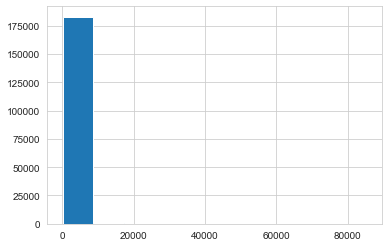

In [9]:
plt.hist(data=df_bay,x='duration_sec');

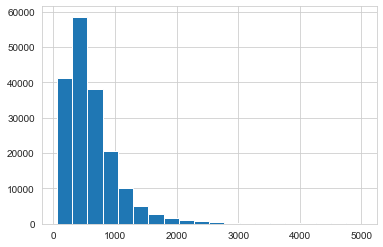

In [10]:
df_bay_duration = df_bay[df_bay['duration_sec'] <= 5000] #here a i check with <=9000 and <=7500 but values greater than 5000 look like outliers
plt.hist(data=df_bay_duration,x='duration_sec',bins=20);

- Bike sharing with very long duration. It seems reasonable to consider trips of up to 5000 seconds
- Someone born in 1878 and sharing bike its improbable

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


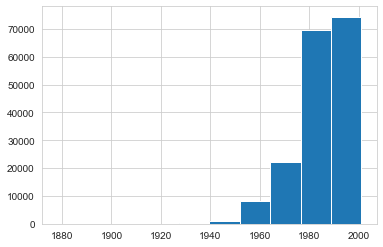

In [11]:
plt.hist(data=df_bay,x='member_birth_year');

Assessing the histogram, it seems reasonable to consider only those born after 1940

In [12]:
#Check duplicated rows
df_bay.duplicated().sum()

0

In [13]:
#Check unique values
df_bay.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip

In [14]:
#Check categorical columns
df_bay.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [15]:
#Check categorical columns
df_bay.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [16]:
#Check categorical columns
df_bay.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

**Quality issues**
- Missing data
- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int
- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip
- Bike sharing with very long duration. It seems reasonable to consider trips of up to 5000 seconds
- Very old people

**Tidiness issues**
- Missing an age column
- Missing a column with duration in minutes
- Missing hour column for start and end date
- Missing day of week column for start and end date

## Cleaning data

In [17]:
#Creating copy of df
df_bay_clean = df_bay.copy()

In [18]:
#Remove missing data
df_bay_clean = df_bay_clean.dropna()
df_bay_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [19]:
#Change dates columns to date datatype
df_bay_clean['start_time'] = df_bay_clean['start_time'].astype('datetime64')
df_bay_clean['end_time'] = df_bay_clean['end_time'].astype('datetime64')
df_bay_clean[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
start_time    174952 non-null datetime64[ns]
end_time      174952 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


In [20]:
#Change member_birth_year to int
df_bay_clean['member_birth_year'] = df_bay_clean['member_birth_year'].astype('Int64')
df_bay_clean[['member_birth_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 1 columns):
member_birth_year    174952 non-null Int64
dtypes: Int64(1)
memory usage: 2.8 MB


In [21]:
#Change categorical columns to category datatype
df_bay_clean['user_type'] = df_bay_clean['user_type'].astype('category')
df_bay_clean['member_gender'] = df_bay_clean['member_gender'].astype('category')
df_bay_clean['bike_share_for_all_trip'] = df_bay_clean['bike_share_for_all_trip'].astype('category')
df_bay_clean[['user_type','member_gender','bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
user_type                  174952 non-null category
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3)
memory usage: 1.8 MB


In [22]:
#Remove bike sharing with very long duration
df_bay_clean = df_bay_clean[(df_bay_clean['duration_sec'] <= 5000) ]

In [23]:
#Check describe again
df_bay_clean.describe()

duration_sec  start_station_id  start_station_latitude  \
count  174068.000000     174068.000000           174068.000000   
mean      628.826694        138.966639               37.771195   
std       483.421483        111.537644                0.100486   
min        61.000000          3.000000               37.317298   
25%       322.000000         47.000000               37.770407   
50%       508.000000        104.000000               37.780760   
75%       783.000000        239.000000               37.797320   
max      4998.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174068.000000   174068.000000         174068.000000   
mean               -122.351639      136.509703             37.771386   
std                   0.117805      111.189618              0.100383   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      237.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          174068.000000  174068.000000      174068.000000  
mean             -122.351211    4482.032706        1984.808190  
std                 0.117356    1659.260218          10.117383  
min              -122.453704      11.000000        1878.000000  
25%              -122.411647    3799.000000        1980.000000  
50%              -122.397405    4960.000000        1987.000000  
75%              -122.285633    5505.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [24]:
#Remove very old people, filtering only who born only from 1940 onwards
df_bay_clean = df_bay_clean[df_bay_clean['member_birth_year'] >= 1940]

In [25]:
#Create age column
df_bay_clean['age'] = 2021 - df_bay_clean['member_birth_year']
df_bay_clean.head(10)

duration_sec              start_time                end_time  \
4           1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5           1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6           1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7           1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8           1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   
9           1049 2019-02-28 23:49:47.699 2019-03-01 00:07:17.025   
10           458 2019-02-28 23:57:57.211 2019-03-01 00:05:35.435   
11           506 2019-02-28 23:56:55.540 2019-03-01 00:05:21.733   
12          1176 2019-02-28 23:45:12.651 2019-03-01 00:04:49.184   
14           395 2019-02-28 23:56:26.848 2019-03-01 00:03:01.947   

    start_station_id                                 start_station_name  \
4                7.0                                Frank H Ogawa Plaza   
5               93.0                       4th St at Mission Bay Blvd S   
6              300.0                               Palm St at Willow St   
7               10.0                         Washington St at Kearny St   
8               10.0                         Washington St at Kearny St   
9               19.0                               Post St at Kearny St   
10             370.0                                Jones St at Post St   
11              44.0  Civic Center/UN Plaza BART Station (Market St ...   
12             127.0                             Valencia St at 21st St   
14             243.0                        Bancroft Way at College Ave   

    start_station_latitude  start_station_longitude  end_station_id  \
4                37.804562              -122.271738           222.0   
5                37.770407              -122.391198           323.0   
6                37.317298              -121.884995           312.0   
7                37.795393              -122.404770           127.0   
8                37.795393              -122.404770           127.0   
9                37.788975              -122.403452           121.0   
10               37.787327              -122.413278            43.0   
11               37.781074              -122.411738           343.0   
12               37.756708              -122.421025           323.0   
14               37.869360              -122.254337           252.0   

                                     end_station_name  end_station_latitude  \
4                               10th Ave at E 15th St             37.792714   
5                                  Broadway at Kearny             37.798014   
6                            San Jose Diridon Station             37.329732   
7                              Valencia St at 21st St             37.756708   
8                              Valencia St at 21st St             37.756708   
9                                  Mission Playground             37.759210   
10  San Francisco Public Library (Grove St at Hyde...             37.778768   
11                                Bryant St at 2nd St             37.783172   
12                                 Broadway at Kearny             37.798014   
14                       Channing Way at Shattuck Ave             37.865847   

    end_station_longitude  bike_id   user_type  member_birth_year  \
4             -122.248780     4898  Subscriber               1974   
5             -122.405950     5200  Subscriber               1959   
6             -121.901782     3803  Subscriber               1983   
7             -122.421025     6329  Subscriber               1989   
8             -122.421025     6548  Subscriber               1988   
9             -122.421339     6488  Subscriber               1992   
10            -122.415929     5318  Subscriber               1996   
11            -122.393572     5848  Subscriber               1993   
12            -122.405950     5328    Customer               1990   
14            -122.267443     4786  Subscriber               1988   

   member_gender 

In [26]:
#Create duration in minutes column
df_bay_clean['duration_min'] = (df_bay_clean['duration_sec'] / 60).round().astype('float64')
df_bay_clean.head()

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
4             37.792714            -122.248780     4898  Subscriber   
5             37.798014            -122.405950     5200  Subscriber   
6             37.329732            -121.901782     3803  Subscriber   
7             37.756708            -122.421025     6329  Subscriber   
8             37.756708            -122.421025     6548  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  age  duration_min  
4               1974          Male                     Yes   47          26.0  
5               1959          Male                      No   62          30.0  
6               1983        Female                      No   38          19.0  
7               1989          Male                      No   32          27.0  
8               1988         Other                      No   33          26.0

In [27]:
#Check describe again
df_bay_clean.describe()

duration_sec  start_station_id  start_station_latitude  \
count  173865.000000     173865.000000           173865.000000   
mean      629.038254        138.988675               37.771176   
std       483.459983        111.539829                0.100540   
min        61.000000          3.000000               37.317298   
25%       322.000000         47.000000               37.770407   
50%       508.000000        104.000000               37.780760   
75%       783.000000        239.000000               37.797320   
max      4998.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            173865.000000   173865.000000         173865.000000   
mean               -122.351597      136.548989             37.771368   
std                   0.117850      111.206424              0.100437   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      237.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year            age  \
count          173865.000000  173865.000000      173865.000000  173865.000000   
mean             -122.351170    4481.758301        1984.883105      36.116895   
std                 0.117403    1659.312640           9.868645       9.868645   
min              -122.453704      11.000000        1941.000000      20.000000   
25%              -122.411647    3799.000000        1980.000000      29.000000   
50%              -122.397405    4960.000000        1987.000000      34.000000   
75%              -122.285633    5505.000000        1992.000000      41.000000   
max              -121.874119    6645.000000        2001.000000      80.000000   

        duration_min  
count  173865.000000  
mean       10.483795  
std         8.061787  
min         1.000000  
25%         5.000000  
50%         8.000000  
75%        13.000000  
max        83.000000

In [28]:
#Creating hour columns for start and end date
df_bay_clean['start_hour'] = df_bay_clean.start_time.dt.strftime('%H')
df_bay_clean['end_hour'] = df_bay_clean.end_time.dt.strftime('%H')

order = df_bay_clean['end_hour'].unique()
order = np.sort(order)

df_bay_clean['start_hour'] = pd.Categorical(df_bay_clean["start_hour"], categories = order)
df_bay_clean['end_hour'] = pd.Categorical(df_bay_clean["end_hour"], categories = order)


df_bay_clean.head()

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
4             37.792714            -122.248780     4898  Subscriber   
5             37.798014            -122.405950     5200  Subscriber   
6             37.329732            -121.901782     3803  Subscriber   
7             37.756708            -122.421025     6329  Subscriber   
8             37.756708            -122.421025     6548  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  age  duration_min  \
4               1974          Male                     Yes   47          26.0   
5               1959          Male                      No   62          30.0   
6               1983        Female                      No   38          19.0   
7               1989          Male                      No   32          27.0   
8               1988         Other                      No   33          26.0   

  start_hour end_hour  
4         23       00  
5         23       00  
6         23       00  
7         23       00  
8         23       00

In [29]:
#Creating weekday columns for start and end date
df_bay_clean['start_day_of_week'] = df_bay_clean.start_time.dt.strftime('%A')
df_bay_clean['end_day_of_week'] = df_bay_clean.end_time.dt.strftime('%A')

week_categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_bay_clean['start_day_of_week'] = pd.Categorical(df_bay_clean["start_day_of_week"], categories = week_categories)
df_bay_clean['end_day_of_week'] = pd.Categorical(df_bay_clean["end_day_of_week"], categories = week_categories)

df_bay_clean.head()

duration_sec              start_time                end_time  \
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
6          1147 2019-02-28 23:55:35.104 2019-03-01 00:14:42.588   
7          1615 2019-02-28 23:41:06.766 2019-03-01 00:08:02.756   
8          1570 2019-02-28 23:41:48.790 2019-03-01 00:07:59.715   

   start_station_id            start_station_name  start_station_latitude  \
4               7.0           Frank H Ogawa Plaza               37.804562   
5              93.0  4th St at Mission Bay Blvd S               37.770407   
6             300.0          Palm St at Willow St               37.317298   
7              10.0    Washington St at Kearny St               37.795393   
8              10.0    Washington St at Kearny St               37.795393   

   start_station_longitude  end_station_id          end_station_name  \
4              -122.271738           222.0     10th Ave at E 15th St   
5              -122.391198           323.0        Broadway at Kearny   
6              -121.884995           312.0  San Jose Diridon Station   
7              -122.404770           127.0    Valencia St at 21st St   
8              -122.404770           127.0    Valencia St at 21st St   

   end_station_latitude  ...   user_type  member_birth_year member_gender  \
4             37.792714  ...  Subscriber               1974          Male   
5             37.798014  ...  Subscriber               1959          Male   
6             37.329732  ...  Subscriber               1983        Female   
7             37.756708  ...  Subscriber               1989          Male   
8             37.756708  ...  Subscriber               1988         Other   

   bike_share_for_all_trip age duration_min  start_hour  end_hour  \
4                      Yes  47         26.0          23        00   
5                       No  62         30.0          23        00   
6                       No  38         19.0          23        00   
7                       No  32         27.0          23        00   
8                       No  33         26.0          23        00   

  start_day_of_week end_day_of_week  
4          Thursday          Friday  
5          Thursday          Friday  
6          Thursday          Friday  
7          Thursday          Friday  
8          Thursday          Friday  

[5 rows x 22 columns]

### What is the structure of your dataset?

The dataset is structured containing a bike sharing in each line, containing data of route, location and customers. So we can divide the features between:

**Route data:**

- duration_sec
- duration_min
- start_time
- end_time
- start_hour
- end_hour
- start_day_of_week
- end_day_of_week
- bike_id

**Location data**

- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude

**Customers data**

- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- age

### What is/are the main feature(s) of interest in your dataset?

I believe the following features can provide interesting insights about the data:

- start_station_name
- end_station_name
- user_type
- member_gender
- bike_share_for_all_trip
- start_day_of_week
- end_day_of_week

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features will support:
- duration_min
- age
- start_hour
- end_hour

## Univariate Exploration

In [30]:
#Setting color base for all univariate plots
color = sb.color_palette()[0]

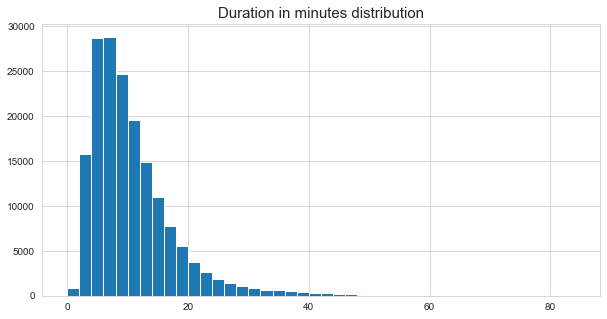

In [31]:
#Check duration in minutes distribution
fig, ax = plt.subplots(figsize=[10,5])
bins = np.arange(0, df_bay_clean['duration_min'].max()+2, 2)
plt.hist(data=df_bay_clean,x='duration_min',bins=bins,color=color)
plt.title('Duration in minutes distribution',fontsize=15);

Most bike sharing lasted up to 10 minutes, with the greatest mass being between 5 and 10 minutes.

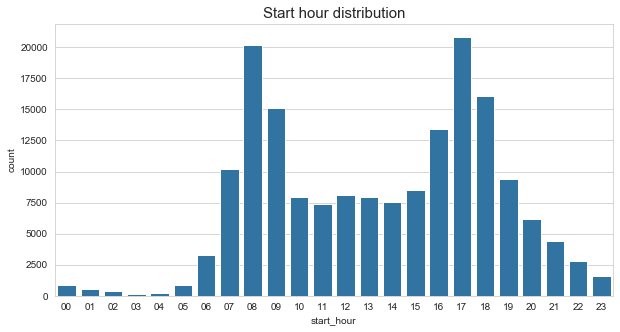

In [32]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='start_hour',color=color)
plt.title('Start hour distribution',fontsize=15);

We can identify 2 peak times for bike sharing start hour: from 8 am to 9 am and 5 pm to 6 pm

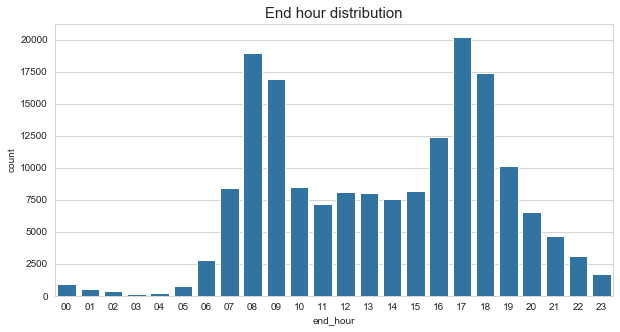

In [33]:
#Check end hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='end_hour',color=color)
plt.title('End hour distribution',fontsize=15);

End hour distribution is practically the same as start hour, which makes sense as bike sharing usually lasts an average of 9 minutes.

In [34]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='start_day_of_week',color=color)

plt.title('Start week day distribution',fontsize=15);

We have a smaller number of trips on weekends

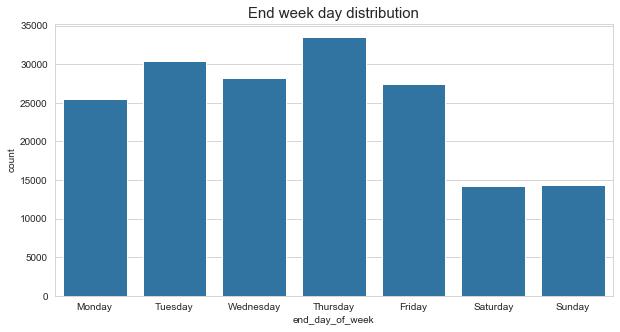

In [35]:
#Check start hour counts
fig, ax = plt.subplots(figsize=[10,5])
sb.countplot(data=df_bay_clean,x='end_day_of_week',color=color)
plt.title('End week day distribution',fontsize=15);

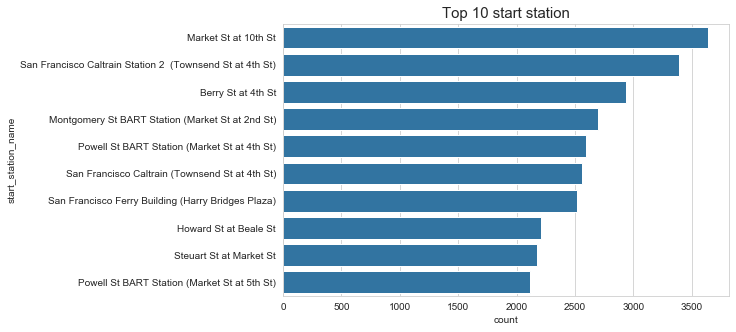

In [36]:
#Check top 10 start station
df_bay_top_10_ss = df_bay_clean.start_station_name.value_counts().head(10).reset_index()
df_bay_top_10_ss.columns = ['start_station_name', 'count']
fig, ax = plt.subplots(figsize=[8,5])
sb.barplot(data=df_bay_top_10_ss,x='count',y='start_station_name',color=color)
plt.title('Top 10 start station',fontsize=15);

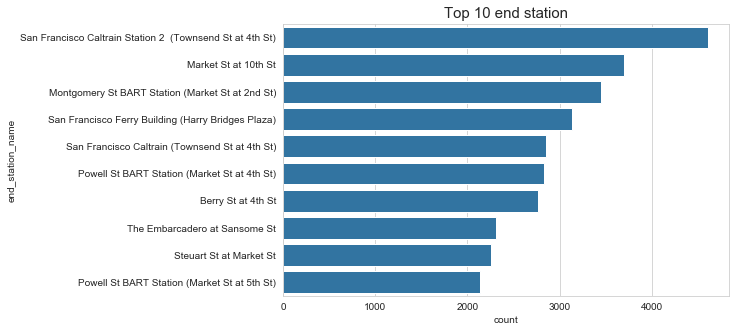

In [37]:
#Check top 10 end station
df_bay_top_10_ss = df_bay_clean.end_station_name.value_counts().head(10).reset_index()
df_bay_top_10_ss.columns = ['end_station_name', 'count']
fig, ax = plt.subplots(figsize=[8,5])
sb.barplot(data=df_bay_top_10_ss,x='count',y='end_station_name',color=color)
plt.title('Top 10 end station',fontsize=15);

Market St and San Francisco Caltrain Station 2 are the most embarking and disembarking stations.

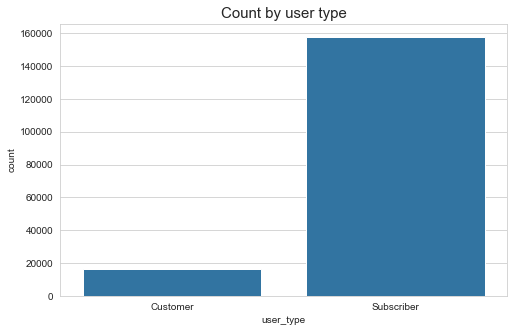

In [38]:
#Check user type counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='user_type',color=color)
plt.title('Count by user type',fontsize=15);

Most users are subscribers.

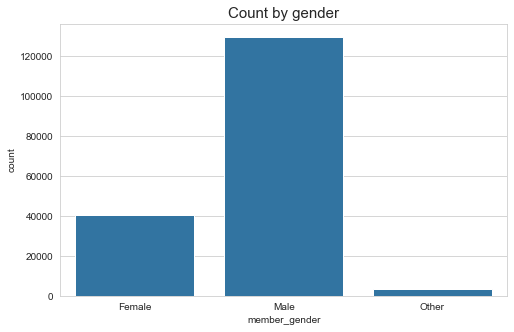

In [39]:
#Check mmember gender counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='member_gender',color=color)
plt.title('Count by gender',fontsize=15);

Users are mostly male, but this may not be a particularity of service users, since we do not know the gender distribution in the city

In [40]:
#Check bike_share_for_all_trip counts
fig, ax = plt.subplots(figsize=[8,5])
sb.countplot(data=df_bay_clean,x='bike_share_for_all_trip',color=color)
plt.title('Count by bike share for all trip',fontsize=15);

Most of the route was not completed with bike share.

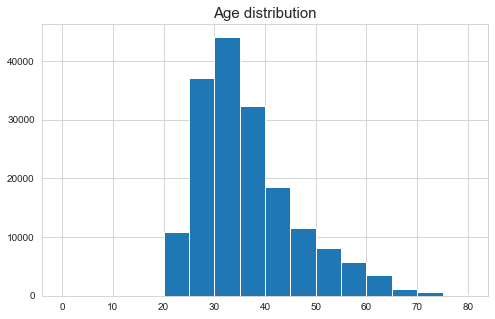

In [41]:
#Check age distribution
fig, ax = plt.subplots(figsize=[8,5])
bins = np.arange(0, df_bay_clean['age'].max()+5, 5)
plt.hist(data=df_bay_clean,x='age',bins=bins,color=color,alpha=1)
plt.title('Age distribution',fontsize=15);

Most users are between 25 and 40 years old.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After investigating the features of interest, I identified the following insights:

- Most bike sharing lasted up to 10 minutes, with the greatest mass being between 5 and 10 minutes
- Most users are subscribed, meaning there are few occasional customers
- We can identify 2 peak times for bike sharing start hour: from 8 am to 9 am and 5 pm to 6 pm. As most users are subscribers, they may have greater influence on peak hours, which are exactly business hours where people usually go to work, so this may be a behavior of these users and the greater distribution of trips on weekdays can reinforce this hypothesis
- End hour distribution is practically the same as start hour, which makes sense as bike sharing usually lasts an average of 9 minutes
- Market St and San Francisco Caltrain Station 2 are the most embarking and disembarking stations
- Although more males use the service this may not be a particularity of service users, since we do not know the gender distribution in the city
- Most of the route was not completed with bike share. As the difference is so big, it's not worth investigating this feature further
- Most frequent users have between 25 and 40 years old

With the transformations performed in the data wrangling step, it was not necessary to apply new transformations, since the data behaved within the normal range

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During the data exploration step no, but during the data wrangling some transformations/corrections were performed. The problems identified were:

**Quality issues**
- Missing data
- Date columns as object
    - start_time
    - end_time
- member_birth_year as float instead int
- Categorical columns as object:
    - user_type
    - member_gender
    - bike_share_for_all_trip
- Bike sharing with very long duration. It seems reasonable to consider trips of up to 5000 seconds
- Very old people

**Tidiness issues**
- Missing an age column
- Missing a column with duration in minutes
- Missing hour column for start and end date
- Missing day of week column for start and end date


## Bivariate Exploration

#### What is the duration for each type of user type ?

In [42]:
fig, ax = plt.subplots(figsize=[8,5])
sb.violinplot(data=df_bay_clean, x='user_type', y='duration_min', color=color, inner='quartile')
plt.title('Trip duration by user type',fontsize=15);

As we can see in the boxplot, users who are occasional customers have a longer trip duration. This makes sense, as subscribers should use the bike more routinely and for a specific purpose, while occasional customers should use it more for leisure or longer trips

#### What is the duration for each member gender ?

In [43]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='member_gender', y='duration_min', color=color)
plt.title('Trip duration by gender',fontsize=15);

The trip duration is practically the same for all genders

#### What is the age for each type of user type ?

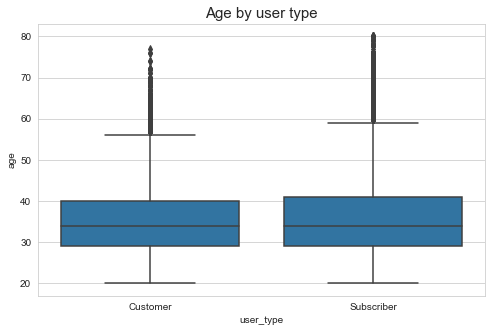

In [44]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='user_type', y='age', color=color)
plt.title('Age by user type',fontsize=15);

 Age is practically the same for all user type

#### What is the age for each member gender ?

In [45]:
fig, ax = plt.subplots(figsize=[8,5])
sb.boxplot(data=df_bay_clean, x='member_gender', y='age', color=color)
plt.title('Age by user gender',fontsize=15);

As with the trip duration, gender seems to have no relation to the user's age

#### What is the user type favorite start and end hour ?

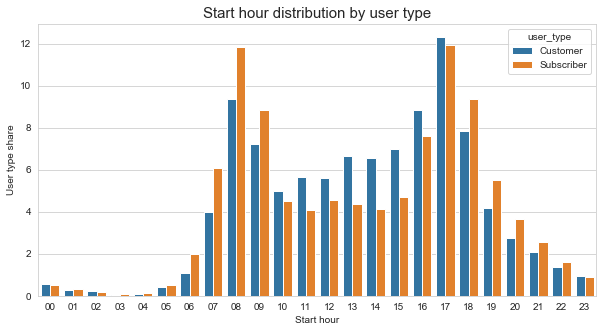

In [47]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','start_hour']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='start_hour',y='duration_sec', hue='user_type')
ax.set_xlabel('Start hour')
ax.set_ylabel('User type share')
plt.title('Start hour distribution by user type',fontsize=15);

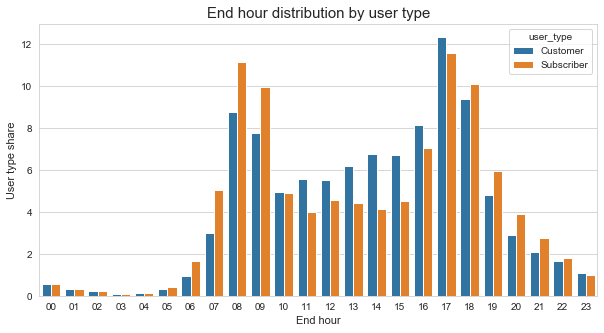

In [48]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','end_hour']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='end_hour',y='duration_sec', hue='user_type')
ax.set_xlabel('End hour',fontsize=11)
ax.set_ylabel('User type share',fontsize=11)
plt.title('End hour distribution by user type',fontsize=15);

Contrary to what I imagined, peak times are very similar between user types, but we can see an interesting behavior: excluding peak times, subscribers tend to use the service more at afternoon than occasional customers, who use more at evening.

#### What is the user type favorite day of week ?

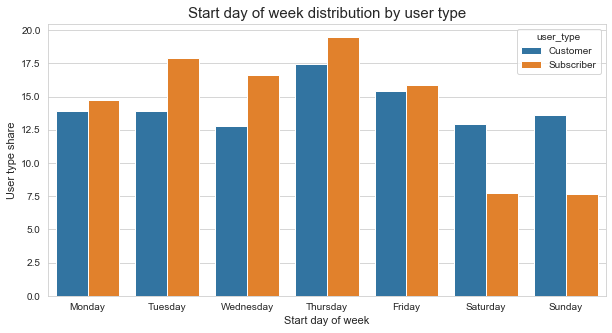

In [49]:
#Calculating percentage to facilitate hourly distribution analysis by user type
df_group = df_bay_clean.groupby(['user_type','start_day_of_week']).agg({'duration_sec': 'count'})
user = df_bay_clean.groupby(['user_type']).agg({'duration_sec': 'count'})
df_group = df_group.div(user, level='user_type') * 100
df_group = df_group.reset_index()

#plot
fig, ax = plt.subplots(figsize=[10,5])
sb.barplot(data=df_group,x='start_day_of_week',y='duration_sec',  hue='user_type')
ax.set_xlabel('Start day of week',fontsize=11)
ax.set_ylabel('User type share',fontsize=11)
plt.title('Start day of week distribution by user type',fontsize=15);

Contrary to what is seen in the behavior of Subscribers, the use of the service by occasional customers remains at the same level on weekends

#### Is there a correlation between age and trip duration

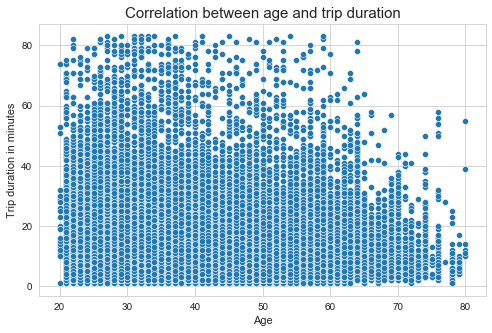

In [50]:
fig, ax = plt.subplots(figsize=[8,5])
sb.scatterplot(data=df_bay_clean, x='age', y='duration_min', color=color)
ax.set_xlabel('Age',fontsize=11)
ax.set_ylabel('Trip duration in minutes',fontsize=11)
plt.title('Correlation between age and trip duration',fontsize=15);

In [51]:
#Check correlation test
df_bay_clean.corr()[['duration_min']]

duration_min
duration_sec                 0.999357
start_station_id            -0.021242
start_station_latitude       0.029163
start_station_longitude     -0.108524
end_station_id              -0.005303
end_station_latitude         0.031107
end_station_longitude       -0.109825
bike_id                      0.033872
member_birth_year           -0.024297
age                          0.024297
duration_min                 1.000000

Scatterplot and statistic test dont show correlation betweenn age and trip duration (p value is only 0.024297)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

When we look at the relationship between two variables, we have the following insights:

- Users who are occasional customers have a longer trip duration. This makes sense, as subscribers should use the bike more routinely and for a specific purpose (like go to work), while occasional customers should use it more for leisure or longer trips
- The trip duration is practically the same for all genders
- The age and trip duration is practically the same for all genders
- Contrary to what I imagined, peak times are very similar between user types, but we can see an interesting behavior: excluding peak times, subscribers tend to use the service more at afternoon than occasional customers, who use more at evening.
- Contrary to what is seen in the behavior of subscribers, the use of the service by occasional customers remains at the same level on weekends

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No, when i used scatterplot and statistic test i didn't identify correlation betweenn age and trip duration

## Multivariate Exploration

#### Whats service usage hours per day of week - Customers x Subscribers

In [52]:
fig, ax = plt.subplots(figsize=[20,10])

plt.subplot(2, 1, 1)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Customer']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Customer')

plt.subplot(2, 1, 2)
df_filter = df_bay_clean[df_bay_clean['user_type']=='Subscriber']
df_group = df_filter.groupby(['start_hour', 'start_day_of_week']).count()['duration_sec']
df_group = df_group.reset_index(name = 'count')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'start_hour',
                            values = 'count')
sb.heatmap(df_group, cbar_kws = {'label' : 'count'},cmap='rocket_r')
plt.title('Subscriber');

Here we confirm that the peak hours of usage during the week is practically the same for both user types. However, the difference between the user types on the weekend is much more evident: occasional customers use the service more, especially between 10am and 5pm. This reinforces the idea that these customers are the ones who use the service more for leisure

#### What's mean of trip duration by user type and start day of week ?

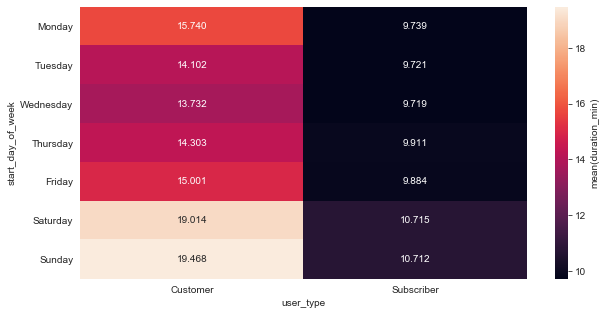

In [53]:
fig, ax = plt.subplots(figsize=[10,5])
df_group = df_bay_clean.groupby(['user_type', 'start_day_of_week']).mean()['duration_min']
df_group = df_group.reset_index(name = 'duration_min_avg')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'user_type',
                            values = 'duration_min_avg')
sb.heatmap(df_group, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})

Although subscribers have a smaller number of users on weekends, this is not reflected in the average trip duration behavior: on weekends for both user types the average trip duration is longer on weekend

#### What's mean of age by user type and start day of week ?

In [54]:
fig, ax = plt.subplots(figsize=[10,5])
df_group = df_bay_clean.groupby(['user_type', 'start_day_of_week']).mean()['age']
df_group = df_group.reset_index(name = 'age_avg')
df_group = df_group.pivot(index = 'start_day_of_week', columns = 'user_type',
                            values = 'age_avg')
sb.heatmap(df_group, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'})

Even though it's a small difference, for both user types we noticed a drop in the average age during the weekends. This difference is more noticeable for occasional customers, what tells us that younger people use the service occasionally for leisure at weekend

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Analysing the relationship between usuer type, start hour and start day of week we confirm that the peak hours of usage during the week is practically the same for both user types. However, the difference between the user types on the weekend is much more evident: occasional customers use the service more, especially between 10am and 5pm. This reinforces the idea that these customers are the ones who use the service more for leisure
- Although subscribers have a smaller number of users on weekends, this is not reflected in the average trip duration behavior: on weekends for both user types the average trip duration is longer on weekend
- Even though it's a small difference, for both user types we noticed a drop in the average age during the weekends. This difference is more noticeable for occasional customers, what tells us that younger people use the service occasionally for leisure at weekend

### Were there any interesting or surprising interactions between features?

The biggest point of interest was the confirmation that occasional customers are what we can most classify as "leisure customers"

#### Export the cleaned dataframe to use on explanatory step
Once I'm sure this dataframe is structured and with quality to answer the necessary questions, I'll export it to be able to use it in the explanatory step

In [57]:
df_bay_clean.to_csv('c:/git-repository/data-analyst-nanodegree/projects/project-5-communicate-data-findings/data/201902-fordgobike-tripdata_cleaned.csv',index=False)